In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy

In [3]:
img_height, img_width = 128, 128
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "../content/drive/MyDrive/Covid19-dataset/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "../content/drive/MyDrive/Covid19-dataset/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 251 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


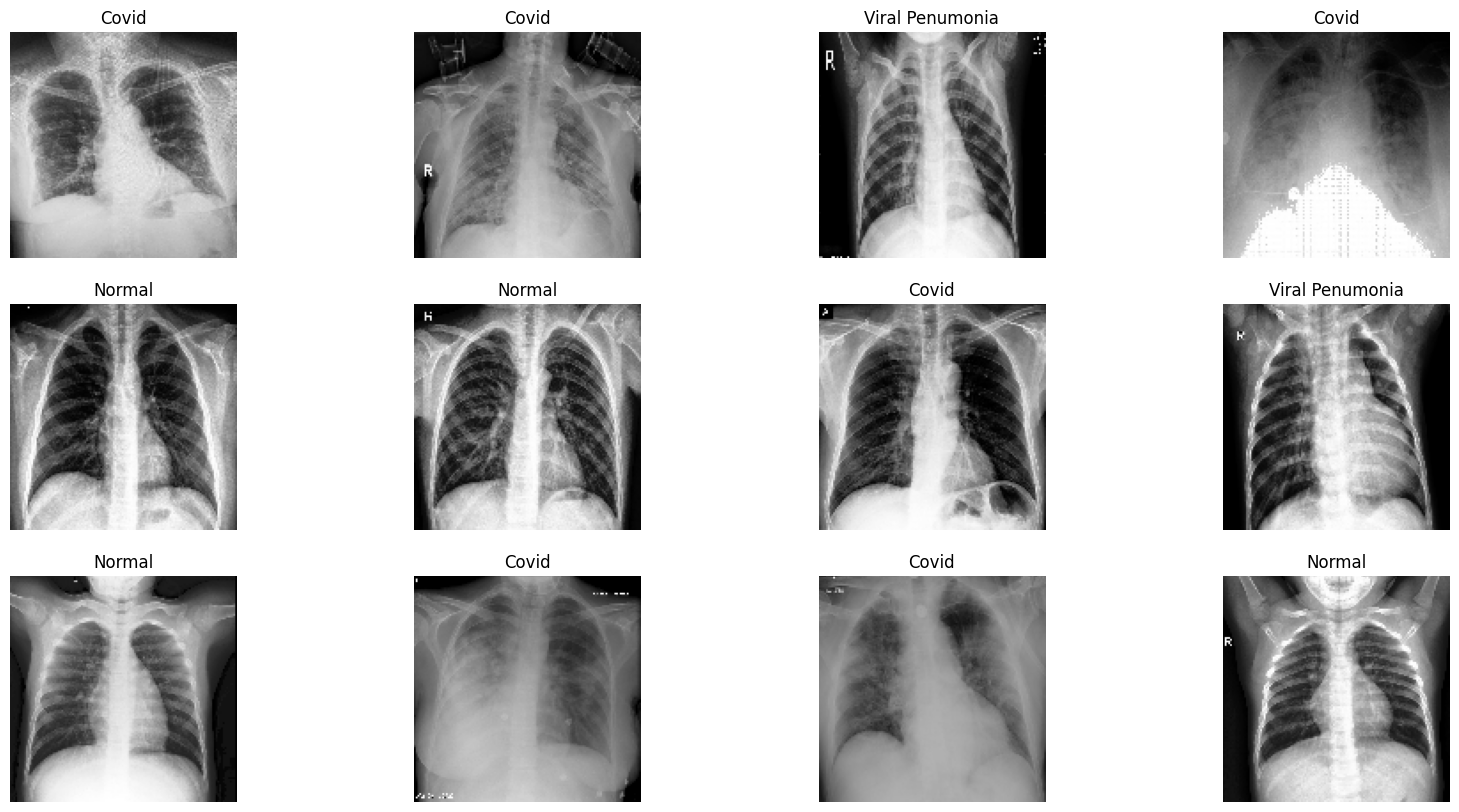

In [4]:
class_names = ['Covid','Normal','Viral Penumonia']
plt.figure(figsize=(20,10))
for images, labels in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [5]:
#Creación del modelo
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3)
    ]
)

In [6]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [12]:
#Impresión del nombre de los autores
print("PORTILLO MORALES NORMA ESMERALDA & VALENZUELA PONCE KEVIN JAIR")

PORTILLO MORALES NORMA ESMERALDA & VALENZUELA PONCE KEVIN JAIR


In [8]:
#Entrenamiento del modelo
model.fit(
    train_ds,
    validation_data = test_ds,
    epochs = 60
)

Epoch 1/60
13/13 [==============================] - 18s 1s/step - loss: 1.1229 - accuracy: 0.3825 - val_loss: 1.0895 - val_accuracy: 0.4848
Epoch 2/60
13/13 [==============================] - 7s 331ms/step - loss: 0.7234 - accuracy: 0.7331 - val_loss: 0.4721 - val_accuracy: 0.7727
Epoch 3/60
13/13 [==============================] - 6s 369ms/step - loss: 0.3255 - accuracy: 0.8765 - val_loss: 0.3307 - val_accuracy: 0.8485
Epoch 4/60
13/13 [==============================] - 5s 272ms/step - loss: 0.2632 - accuracy: 0.9044 - val_loss: 0.4939 - val_accuracy: 0.8030
Epoch 5/60
13/13 [==============================] - 7s 449ms/step - loss: 0.1909 - accuracy: 0.9283 - val_loss: 0.4843 - val_accuracy: 0.8182
Epoch 6/60
13/13 [==============================] - 6s 266ms/step - loss: 0.1604 - accuracy: 0.9323 - val_loss: 0.4474 - val_accuracy: 0.8636
Epoch 7/60
13/13 [==============================] - 6s 272ms/step - loss: 0.1231 - accuracy: 0.9602 - val_loss: 0.3163 - val_accuracy: 0.8788
Epoch 8/

In [9]:
model.save('model/vgg16_best.h5', True)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
model.evaluate(test_ds)

4/4 [==============================] - 1s 49ms/step - loss: 0.2674 - accuracy: 0.9091


[0.2674191892147064, 0.9090909361839294]

In [11]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('model/vgg16_best.h5', monitor='val_accuracy', verbose=1, mode='max',save_best_only=True)
early = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min",restore_best_weights=True, patience=5)

callbacks_list = [checkpoint,early]

history = model.fit(
        train_ds,
        validation_data = test_ds,
        #steps_per_epoch=10,
        epochs=20,
        shuffle=False,
        verbose=True,
        callbacks=callbacks_list)

Epoch 1/20
13/13 [==============================] - ETA: 0s - loss: 5.3423e-05 - accuracy: 1.0000
Epoch 1: val_accuracy improved from -inf to 0.90909, saving model to model/vgg16_best.h5
13/13 [==============================] - 9s 311ms/step - loss: 5.3423e-05 - accuracy: 1.0000 - val_loss: 0.2650 - val_accuracy: 0.9091
Epoch 2/20
13/13 [==============================] - ETA: 0s - loss: 5.0913e-05 - accuracy: 1.0000
Epoch 2: val_accuracy did not improve from 0.90909
13/13 [==============================] - 8s 452ms/step - loss: 5.0913e-05 - accuracy: 1.0000 - val_loss: 0.2682 - val_accuracy: 0.9091
Epoch 3/20
13/13 [==============================] - ETA: 0s - loss: 4.8812e-05 - accuracy: 1.0000
Epoch 3: val_accuracy did not improve from 0.90909
13/13 [==============================] - 7s 395ms/step - loss: 4.8812e-05 - accuracy: 1.0000 - val_loss: 0.2641 - val_accuracy: 0.9091
Epoch 4/20
13/13 [==============================] - ETA: 0s - loss: 4.6897e-05 - accuracy: 1.0000
Epoch 4: val

In [13]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("./covid19-model.tflite", 'wb') as f:
  f.write(tflite_model)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9

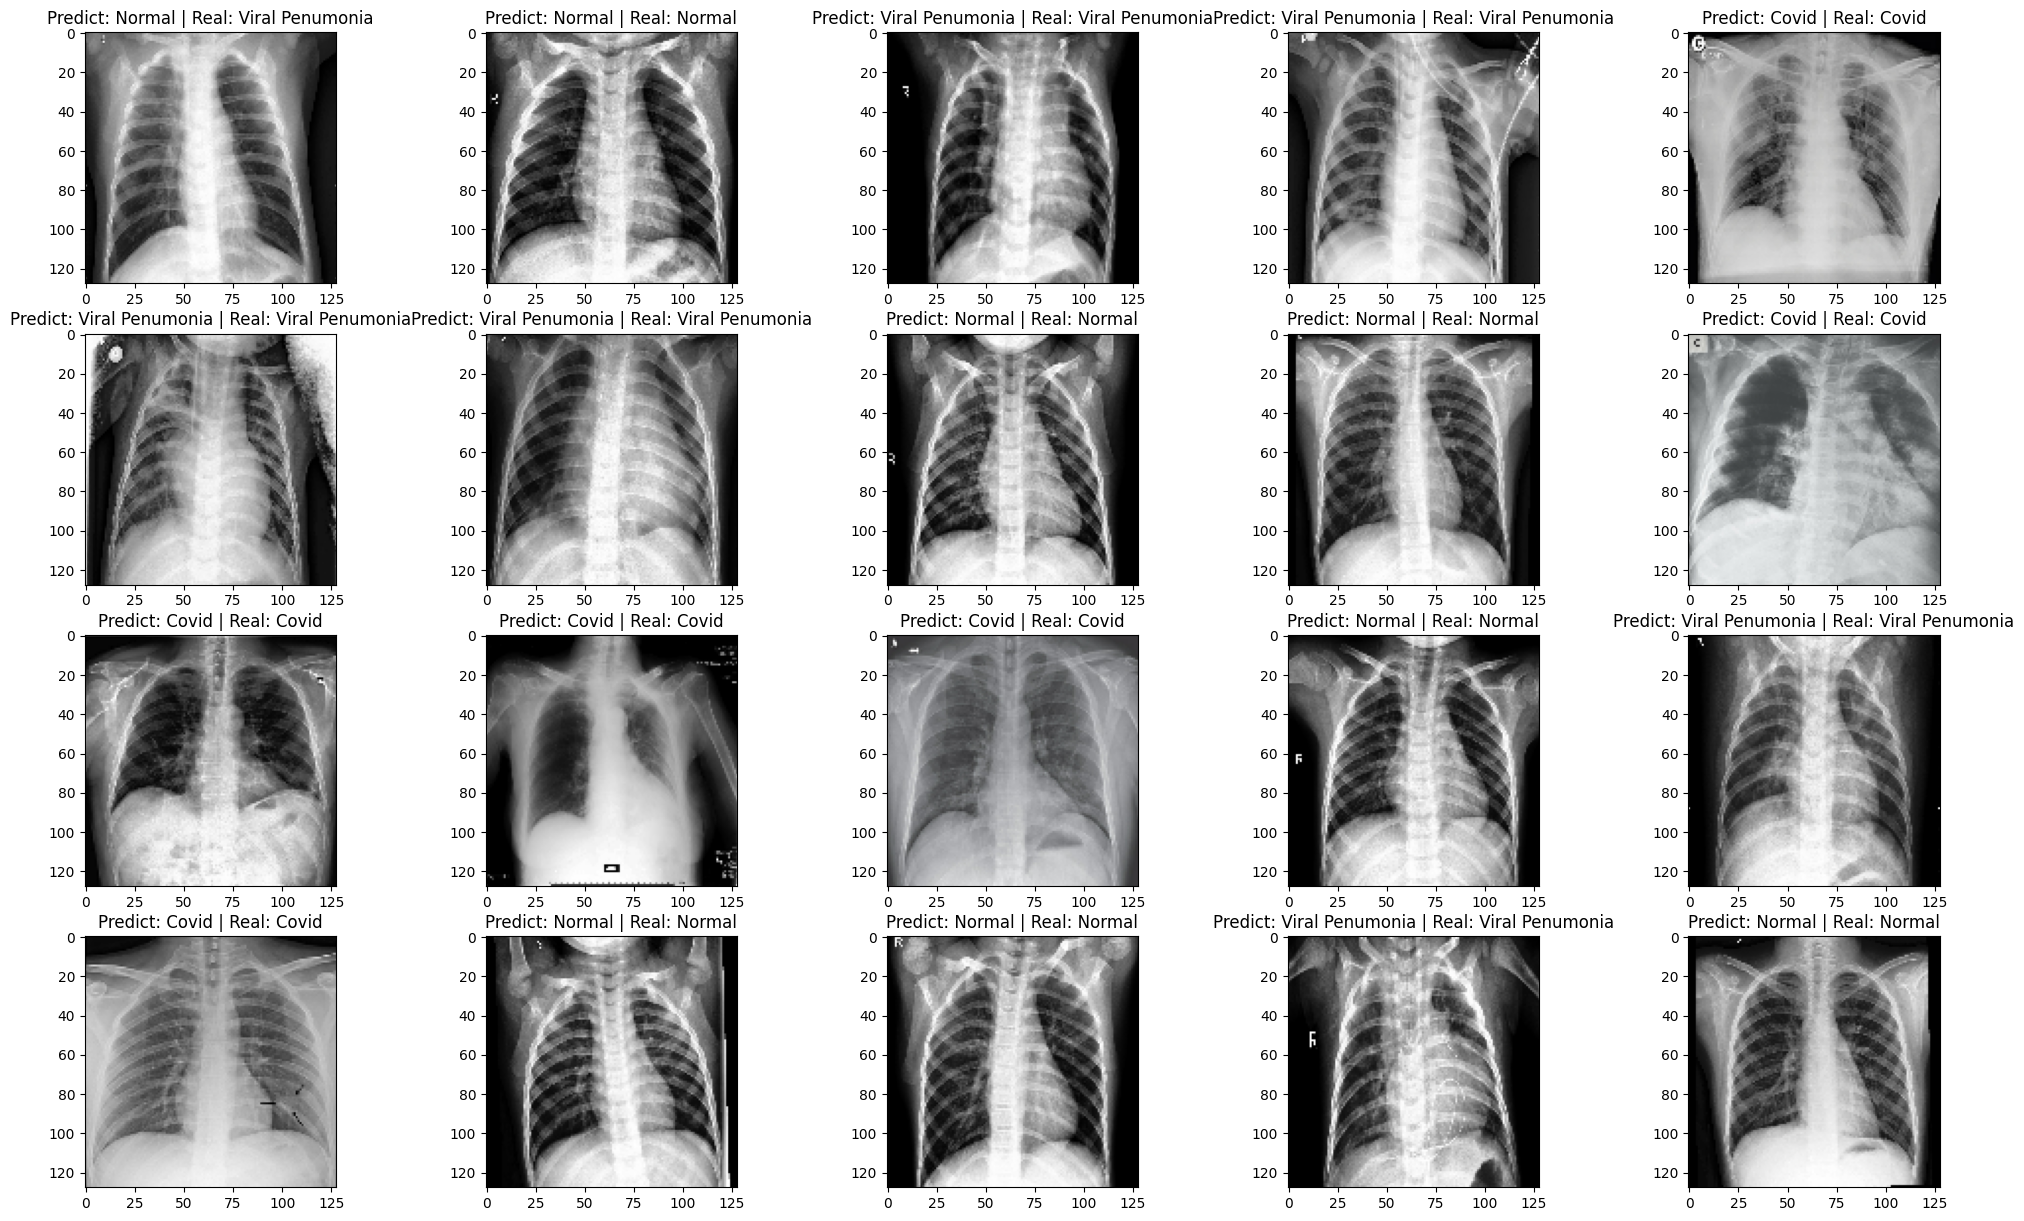

In [17]:
loaded_model = tf.keras.models.load_model("model/vgg16_best.h5")
loaded_model.summary()
plt.figure(figsize=(25,15))
for images, labels in test_ds.take(1):
  classifications = loaded_model(images)
  # print(classifications)

  for i in range(20):
    ax = plt.subplot(4, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Predict: " + class_names[index] + " | Real: " + class_names[labels[i]])